<a href="https://colab.research.google.com/github/sayyed-uoft/fullstackai/blob/main/09_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strata.ai - Artificial Intelligence Certificate 

# Module 1: Data Science for AI

# Time Series Analysis

Source: https://github.com/PacktPublishing/Pandas-Cookbook

## Learning Outcome

- Learn how to work with  datae and time in Python and Pandas
- Learn how to analyze time series data

# Topics

* [Understanding the difference between Python and pandas date tools](#Understanding-the-difference-between-Python-and-pandas-date-tools)
* [Slicing time series intelligently](#Slicing-time-series-intelligently)
* [Using methods that only work with a DatetimeIndex](#Using-methods-that-only-work-with-a-DatetimeIndex)
* [Counting the number of weekly crimes](#Counting-the-number-of-weekly-crimes)
* [Aggregating weekly crime and traffic accidents separately](#Aggregating-weekly-crime-and-traffic-separately)
* [Measuring crime by weekday and year](#Measuring-crime-by-weekday-and-year)
* [Grouping with anonymous functions with a DatetimeIndex](#Grouping-with-anonymous-functions-with-a-DatetimeIndex)
* [Grouping by a Timestamp and another column](#Grouping-by-a-Timestamp-and-another-column)
* [Finding the last time crime was 20% lower with merge_asof](#Finding-the-last-time-crime-was-20%-lower-with-merge_asof)

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4]

# Understanding the difference between Python and pandas date tools

In [ ]:
date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7, 
                       hour=12, minute=30, second=19, microsecond=463198)

print("date is ", date)
print("time is", time)
print("datetime is", dt)

date is  2013-06-07
time is 12:30:19.463198
datetime is 2013-06-07 12:30:19.463198


In [ ]:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, 
                        seconds=6.73, milliseconds=99, microseconds=8)
print(td)
print('new date is', date + td)
print('new datetime is', dt + td)

19 days, 10:20:06.829008
new date is 2013-06-26
new datetime is 2013-06-26 22:50:26.292206


In [ ]:
print(type(time))
print(type(td))
time + td

<class 'datetime.time'>
<class 'datetime.timedelta'>


TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

In [ ]:
pd.Timestamp(year=2012, month=12, day=21, hour=5, minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [ ]:
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [ ]:
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [ ]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [ ]:
pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

In [ ]:
pd.Timestamp(500) # nanoseconds 1e-9

Timestamp('1970-01-01 00:00:00.000000500')

In [ ]:
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

In [ ]:
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [ ]:
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [ ]:
pd.Timestamp('Saturday September 30th, 2017')

Timestamp('2017-09-30 00:00:00')

In [ ]:
pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm', format='Start Date: %b %d, %Y Start Time: %I:%M %p')

Timestamp('2017-09-30 13:30:00')

In [ ]:
pd.to_datetime(100, unit='D', origin='2013-1-1')

Timestamp('2013-04-11 00:00:00')

In [ ]:
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [ ]:
pd.to_datetime(['Aug 3 1999 3:45:56', '10/31/2017'])

DatetimeIndex(['1999-08-03 03:45:56', '2017-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
#errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
#    If ‘raise’, then invalid parsing will raise an exception.
#    If ‘coerce’, then invalid parsing will be set as NaT.
#   If ‘ignore’, then invalid parsing will return the input.

s = pd.Series(['12-5-2015', '14-1-2013', '20/12/2017', '40/23/2017'])
pd.to_datetime(s, dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [ ]:
pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456')

In [ ]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [ ]:
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [ ]:
pd.to_timedelta('5 dayz', errors='ignore')

'5 dayz'

In [ ]:
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [ ]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

In [ ]:
time_strings = ['2 days 24 minutes 89.67 seconds', '00:45:23.6']
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [ ]:
pd.Timestamp('1/1/2017') + pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timestamp('2017-01-25 10:06:00')

In [ ]:
td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2

TimedeltaIndex(['03:00:10', '04:01:40'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.Timedelta('12 days') / pd.Timedelta('3 days')

4.0

In [ ]:
ts = pd.Timestamp('2016-10-1 4:23:23.9')

In [ ]:
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [ ]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [ ]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [ ]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [ ]:
td = pd.Timedelta(125.8723, unit='h')
td

Timedelta('5 days 05:52:20.280000')

In [ ]:
td.round('min')

Timedelta('5 days 05:52:00')

In [ ]:
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [ ]:
td.total_seconds()

453140.28

In [ ]:
date_string_list = ['Sep 30 1984'] * 10000

In [ ]:
%timeit pd.to_datetime(date_string_list, format='%b %d %Y')

2.4 ms ± 77.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit pd.to_datetime(date_string_list)

2.75 ms ± 79.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Slicing time series intelligently

In [6]:
!wget https://github.com/sayyed-uoft/fullstackai/raw/main/crime.h5.zip
!unzip crime.h5.zip

--2022-01-07 22:20:08--  https://github.com/sayyed-uoft/fullstackai/raw/main/crime.h5.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sayyed-uoft/fullstackai/main/crime.h5.zip [following]
--2022-01-07 22:20:08--  https://raw.githubusercontent.com/sayyed-uoft/fullstackai/main/crime.h5.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18054265 (17M) [application/zip]
Saving to: ‘crime.h5.zip.1’

crime.h5.zip.1      100%[===================>]  17.22M  --.-KB/s    in 0.06s   

2022-01-07 22:20:08 (305 MB/s) - ‘crime.h5.zip.1’ saved [18054265/18054265]

Archive:  crime.h5.zip
  inflating: crime

In [7]:
crime = pd.read_hdf('crime.h5', 'crime')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [ ]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [ ]:
pd.options.display.max_rows = 4

In [ ]:
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [ ]:
crime.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
...,...,...,...,...,...,...,...
2016-05-12 15:59:00,menacing-felony-w-weap,aggravated-assault,-104.935172,39.723703,hilltop,1,0
2016-05-12 16:39:00,assault-dv,other-crimes-against-persons,-104.974700,39.740555,north-capitol-hill,1,0


In [ ]:
crime.loc['2016-05'].shape

(8012, 7)

In [ ]:
crime.loc['2016'].shape

(91076, 7)

In [ ]:
crime.loc['2016-05-12 03'].shape

(4, 7)

In [ ]:
crime.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:45:00,violation-of-restraining-order,all-other-crimes,-105.034887,39.741827,west-colfax,1,0
2015-12-31 23:50:00,weapon-poss-illegal-dangerous,all-other-crimes,-105.032769,39.709188,westwood,1,0


In [ ]:
crime.loc['2016 Sep, 15'].shape

(252, 7)

In [ ]:
crime.loc['21st October 2014 05'] #hour 05

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-10-21 05:19:00,traf-other,all-other-crimes,-105.006459,39.769287,highland,1,0
2014-10-21 05:11:00,criminal-trespassing,all-other-crimes,-104.962105,39.676030,university,1,0
2014-10-21 05:47:00,harassment-dv,public-disorder,-104.765032,39.801407,dia,1,0
2014-10-21 05:00:00,criminal-mischief-mtr-veh,public-disorder,-105.020969,39.756938,jefferson-park,1,0


In [ ]:
crime.loc['2015-3-4':'2016-1-1'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:45:00,drug-cocaine-possess,drug-alcohol,-104.987310,39.753598,five-points,1,0
2016-01-01 23:48:00,drug-poss-paraphernalia,drug-alcohol,-104.986020,39.752541,five-points,1,0


In [ ]:
crime.loc['2015-3-4 22':'2016-1-1 23:45:00'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
...,...,...,...,...,...,...,...
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0
2016-01-01 23:45:00,drug-cocaine-possess,drug-alcohol,-104.987310,39.753598,five-points,1,0


In [ ]:
%timeit crime.loc['2015-3-4':'2016-1-1']

5.92 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
crime_sort = crime.sort_index()

In [ ]:
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

706 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
pd.options.display.max_rows = 6

# Using methods that only work with a DatetimeIndex

In [ ]:
crime = pd.read_hdf('crime.h5', 'crime').set_index('REPORTED_DATE')
print(type(crime.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
crime.between_time('2:00', '5:00', include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [ ]:
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [ ]:
crime_sort = crime.sort_index()

In [ ]:
crime_sort

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2017-09-29 04:12:00,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0
2017-09-29 04:12:00,drug-pcs-other-drug,drug-alcohol,-105.048416,39.726209,villa-park,1,0
2017-09-29 06:16:00,theft-of-motor-vehicle,auto-theft,-104.890269,39.657222,hampden,1,0


In [ ]:
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
2012-07-01 00:01:00,robbery-street,robbery,-104.924292,39.767585,northeast-park-hill,1,0


In [ ]:
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-29 23:41:00,robbery-street,robbery,-104.991912,39.756163,five-points,1,0
2012-06-29 23:57:00,assault-simple,other-crimes-against-persons,-104.987360,39.715162,speer,1,0
2012-06-30 00:04:00,traffic-accident,traffic-accident,-104.894697,39.628902,hampden-south,0,1


In [ ]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


In [ ]:
crime_sort.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


In [ ]:
crime_sort.first('5D')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0
2012-01-06 23:44:00,theft-of-motor-vehicle,auto-theft,-104.845356,39.794035,montbello,1,0
2012-01-06 23:55:00,threats-to-injure,public-disorder,-105.004788,39.708714,athmar-park,1,0


In [ ]:
crime_sort.first('5B')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-01-08 23:52:00,theft-other,larceny,-104.968227,39.739752,cheesman-park,1,0
2012-01-09 00:04:00,traffic-accident-hit-and-run,traffic-accident,-104.973343,39.760757,five-points,0,1
2012-01-09 00:05:00,fraud-criminal-impersonation,white-collar-crime,-105.024676,39.712702,valverde,1,0


In [ ]:
crime_sort.first('7W')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,-104.919946,39.761917,north-park-hill,0,1
2012-02-18 22:44:00,criminal-mischief-mtr-veh,public-disorder,-105.044984,39.736776,west-colfax,1,0
2012-02-18 23:27:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.009018,39.708701,athmar-park,1,0


In [ ]:
crime_sort.first('3QS')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,-104.988838,39.686925,overland,1,0
2012-09-30 23:41:00,traffic-accident-hit-and-run,traffic-accident,-105.087598,39.638462,marston,0,1
2012-09-30 23:43:00,robbery-business,robbery,-104.772712,39.781966,gateway-green-valley-ranch,1,0


In [ ]:
dt = pd.Timestamp('2012-1-16 13:40')
dt + pd.DateOffset(months=1)

Timestamp('2012-02-16 13:40:00')

In [ ]:
do = pd.DateOffset(years=2, months=5, days=3, hours=8, seconds=10)
pd.Timestamp('2012-1-22 03:22') + do

Timestamp('2014-06-25 11:22:10')

In [ ]:
pd.options.display.max_rows=60

# Counting the number of weekly crimes

In [ ]:
crime_sort = pd.read_hdf('crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [ ]:
crime_sort.resample('W')

In [ ]:
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [ ]:
len(crime_sort.loc[:'2012-1-8'])

877

In [ ]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])

1071

In [ ]:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

In [ ]:
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size()
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [ ]:
weekly_crimes.equals(weekly_crimes_gby)

True

In [ ]:
r = crime_sort.resample('W')
resample_methods = [attr for attr in dir(r) if attr[0].islower()]
print(resample_methods)

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'ngroups', 'nunique', 'obj', 'ohlc', 'pad', 'plot', 'prod', 'sem', 'size', 'std', 'sum', 'transform', 'var']


In [ ]:
crime = pd.read_hdf('crime.h5', 'crime')
weekly_crimes2 = crime.resample('W', on='REPORTED_DATE').size()
weekly_crimes2.equals(weekly_crimes)

True

In [ ]:
weekly_crimes_gby2 = crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size()
weekly_crimes_gby2.equals(weekly_crimes_gby)

True

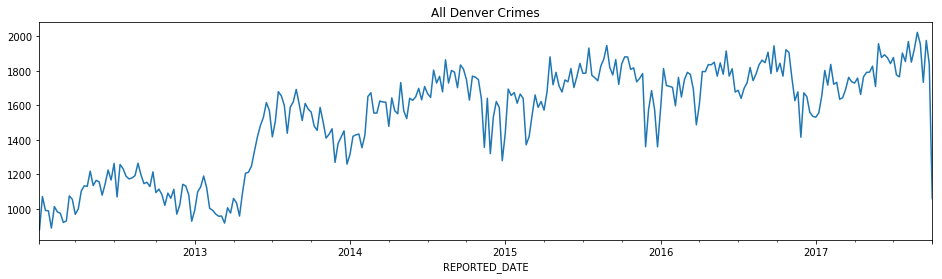

In [ ]:
weekly_crimes.plot(figsize=(16,4), title='All Denver Crimes')

# Aggregating weekly crime and traffic separately

In [ ]:
crime_sort = pd.read_hdf('crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [ ]:
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [ ]:
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [ ]:
crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [ ]:
crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly2.equals(crime_quarterly)

True

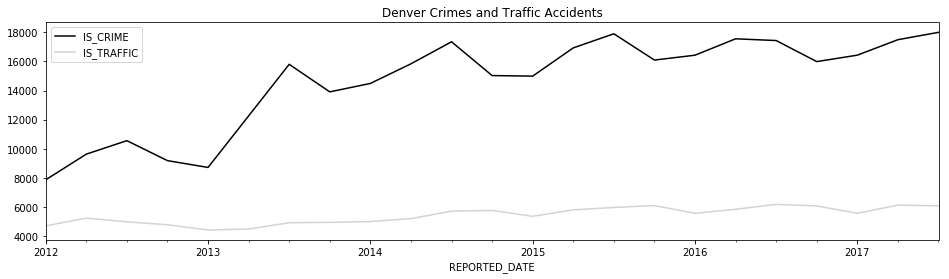

In [ ]:
plot_kwargs = dict(figsize=(16,4), 
                   color=['black', 'lightgrey'], 
                   title='Denver Crimes and Traffic Accidents')
crime_quarterly.plot(**plot_kwargs)

In [ ]:
crime_sort.resample('Q').sum().head()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006e+06,496960.237747,7882,4726
2012-06-30,-1.547274e+06,585656.789182,9641,5255
2012-09-30,-1.615835e+06,611604.800384,10566,5003
2012-12-31,-1.458177e+06,551923.040048,9197,4802
2013-03-31,-1.368931e+06,518159.721947,8730,4442


In [ ]:
crime_sort.resample('QS-MAR')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2011-12-01,5013,3198
2012-03-01,9260,4954
2012-06-01,10524,5190
2012-09-01,9450,4777
2012-12-01,9003,4652


In [ ]:
crime_begin = crime_quarterly.iloc[0]
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

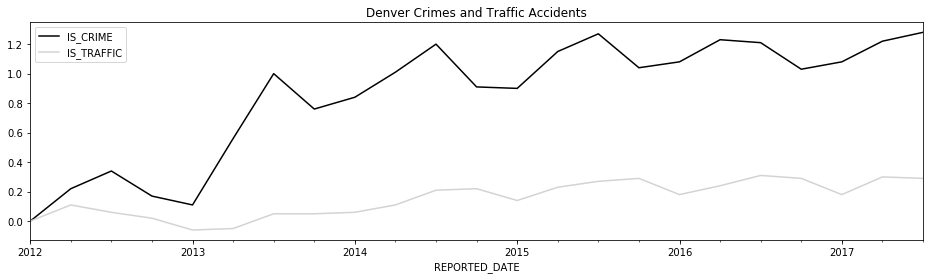

In [ ]:
crime_quarterly.div(crime_begin) \
               .sub(1) \
               .round(2) \
               .plot(**plot_kwargs)

# Measuring crime by weekday and year

In [ ]:
crime = pd.read_hdf('crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [ ]:
wd_counts = crime['REPORTED_DATE'].dt.day_name().value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
             ...  
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, Length: 7, dtype: int64

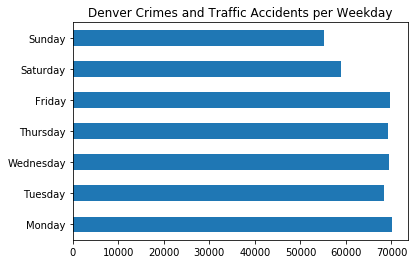

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
        'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'
wd_counts.reindex(days).plot(kind='barh', title=title)

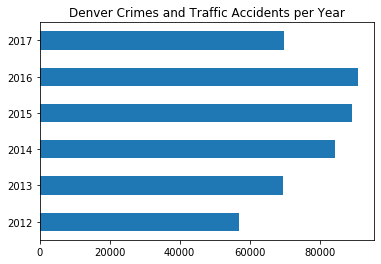

In [ ]:
title = 'Denver Crimes and Traffic Accidents per Year' 
crime['REPORTED_DATE'].dt.year.value_counts() \
                              .sort_index() \
                              .plot(kind='barh', title=title)

In [ ]:
weekday = crime['REPORTED_DATE'].dt.day_name()
year = crime['REPORTED_DATE'].dt.year

crime_wd_y = crime.groupby([year, weekday]).size()
crime_wd_y.head(10)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
                                ...  
2013           Friday           10380
               Monday           10627
               Saturday          8875
Length: 10, dtype: int64

In [ ]:
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']).unstack('Weekday')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [ ]:
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [ ]:
round(272 / 365, 3)

0.745

In [ ]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272) \
                                  .groupby(year) \
                                  .mean() \
                                  .round(3)
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [ ]:
crime_pct.loc[2012:2016].median()

0.748

In [ ]:
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int')
crime_table = crime_table.reindex(columns=days)
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


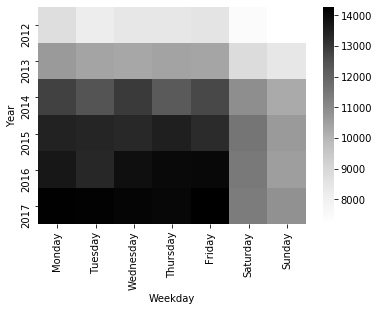

In [ ]:
import seaborn as sns
sns.heatmap(crime_table, cmap='Greys')

In [ ]:
denver_pop = pd.read_csv('https://github.com/sayyed-uoft/fullstackai/raw/main/denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [ ]:
den_100k = denver_pop.div(100000).squeeze()
den_100k

Year
2017    7.05
2016    6.93
2015    6.80
2014    6.62
2013    6.47
2012    6.34
Name: Population, dtype: float64

In [ ]:
crime_table2 = crime_table.div(den_100k, axis='index').astype('int')
crime_table2

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


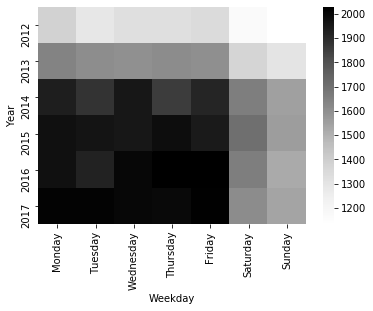

In [ ]:
sns.heatmap(crime_table2, cmap='Greys')

In [ ]:
ADJ_2017 = .748

def count_crime(df, offense_cat): 
    df = df[df['OFFENSE_CATEGORY_ID'] == offense_cat]
    weekday = df['REPORTED_DATE'].dt.day_name()
    year = df['REPORTED_DATE'].dt.year
    
    ct = df.groupby([year, weekday]).size().unstack()
    ct.loc[2017] = ct.loc[2017].div(ADJ_2017).astype('int')
    
    pop = pd.read_csv('https://github.com/sayyed-uoft/fullstackai/raw/main/denver_pop.csv', index_col='Year')
    pop = pop.squeeze().div(100000)
    
    ct = ct.div(pop, axis=0).astype('int')
    ct = ct.reindex(columns=days)
    sns.heatmap(ct, cmap='Greys')
    return ct

REPORTED_DATE,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


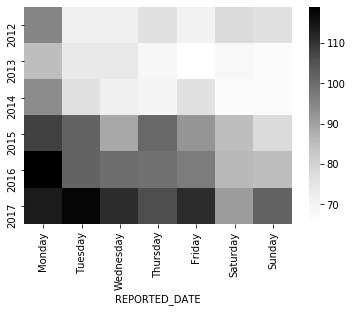

In [ ]:
count_crime(crime, 'auto-theft')

# Grouping with anonymous functions with a DatetimeIndex

In [ ]:
crime_sort = pd.read_hdf('crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [ ]:
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))
print([attr for attr in common_attrs if attr[0] != '_'])

['normalize', 'week', 'strftime', 'min', 'day', 'floor', 'date', 'to_period', 'timetz', 'month_name', 'tzinfo', 'hour', 'day_name', 'round', 'daysinmonth', 'is_year_start', 'is_leap_year', 'tz_convert', 'is_year_end', 'to_numpy', 'freq', 'weekday', 'dayofweek', 'weekofyear', 'microsecond', 'dayofyear', 'to_pydatetime', 'is_quarter_start', 'to_julian_date', 'month', 'second', 'tz_localize', 'is_month_end', 'days_in_month', 'is_quarter_end', 'time', 'nanosecond', 'tz', 'max', 'freqstr', 'quarter', 'resolution', 'ceil', 'is_month_start', 'year', 'minute']


In [ ]:
crime_sort.index.day_name().value_counts()

Monday       70024
Friday       69621
Wednesday    69538
             ...  
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, Length: 7, dtype: int64

In [ ]:
crime_sort.groupby(lambda x: x.day_name())[['IS_CRIME', 'IS_TRAFFIC']].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
...,...,...
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [ ]:
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]
cr_group = crime_sort.groupby(funcs)[['IS_CRIME', 'IS_TRAFFIC']].sum()
cr_final = cr_group.unstack()
cr_final.style.highlight_max(color='lightgrey')

In [ ]:
cr_final.xs('IS_TRAFFIC', axis='columns', level=0).head()

,2012,2013,2014,2015,2016,2017
0,919,792,978,1136,980,782
2,718,652,779,773,718,537
4,399,378,424,471,464,313
6,411,399,479,494,593,462
8,1957,1955,2210,2331,2372,1828


In [ ]:
cr_final.xs(2016, axis='columns', level=1).head()

,IS_CRIME,IS_TRAFFIC
0,5377,980
2,4091,718
4,3044,464
6,2108,593
8,4488,2372


# Grouping by a Timestamp and another column

In [ ]:
employee = pd.read_csv('https://github.com/sayyed-uoft/fullstackai/raw/main/employee.csv', 
                       parse_dates=['JOB_DATE', 'HIRE_DATE'], 
                       index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [ ]:
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [ ]:
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [ ]:
sal_avg = employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().round(-2)
sal_avg

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [ ]:
sal_avg.unstack('GENDER')

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
1978-01-01,NaN,72300.0
1985-01-01,57600.0,NaN
1988-01-01,NaN,64600.0
1995-01-01,55500.0,NaN
1998-01-01,NaN,59700.0
2005-01-01,51700.0,NaN


In [ ]:
employee[employee['GENDER'] == 'Male'].index.min()

Timestamp('1958-12-29 00:00:00')

In [ ]:
employee[employee['GENDER'] == 'Female'].index.min()

Timestamp('1975-06-09 00:00:00')

In [ ]:
sal_avg2 = employee.groupby(['GENDER', pd.Grouper(freq='10AS')])['BASE_SALARY'].mean().round(-2)
sal_avg2

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [ ]:
sal_final = sal_avg2.unstack('GENDER')
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


In [ ]:
years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + '-' + years_right.astype(str)
sal_final

GENDER,Female,Male
1958-1967,NaN,81200.0
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0


In [ ]:
cuts = pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

array([Interval(1958.0, 1970.0, closed='right'),
       Interval(1970.0, 1981.0, closed='right'),
       Interval(1981.0, 1993.0, closed='right'),
       Interval(1993.0, 2004.0, closed='right'),
       Interval(2004.0, 2016.0, closed='right')], dtype=object)

In [ ]:
employee.groupby([cuts, 'GENDER'])['BASE_SALARY'].mean().unstack('GENDER').round(-2)

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0


# Finding the last time crime was 20% lower with merge_asof

In [ ]:
crime_sort = pd.read_hdf('crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [ ]:
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

In [ ]:
crime_sort = crime_sort[:'2017-8']
crime_sort.index.max()

Timestamp('2017-08-31 23:52:00')

In [ ]:
all_data = crime_sort.groupby([pd.Grouper(freq='M'), 'OFFENSE_CATEGORY_ID']).size()
all_data.head()

REPORTED_DATE  OFFENSE_CATEGORY_ID
2012-01-31     aggravated-assault     113
               all-other-crimes       124
               arson                    5
               auto-theft             275
               burglary               343
dtype: int64

In [ ]:
all_data = all_data.sort_values().reset_index(name='Total')
all_data.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2012-01-31,murder,0
1,2016-05-31,murder,1
2,2013-01-31,arson,1
3,2016-12-31,murder,1
4,2014-12-31,murder,1


In [ ]:
goal = all_data[all_data['REPORTED_DATE'] == '2017-8-31'].reset_index(drop=True)
goal['Total_Goal'] = goal['Total'].mul(.8).astype(int)
goal.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
0,2017-08-31,murder,7,5
1,2017-08-31,arson,7,5
2,2017-08-31,sexual-assault,57,45
3,2017-08-31,robbery,108,86
4,2017-08-31,white-collar-crime,138,110


In [ ]:
pd.merge_asof(goal, all_data, left_on='Total_Goal', right_on='Total', 
              by='OFFENSE_CATEGORY_ID', suffixes=('_Current', '_Last'))

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08-31,murder,7,5,2017-05-31,5
1,2017-08-31,arson,7,5,2012-01-31,5
2,2017-08-31,sexual-assault,57,45,2013-01-31,45
...,...,...,...,...,...,...
12,2017-08-31,public-disorder,878,702,2015-12-31,699
13,2017-08-31,all-other-crimes,1583,1266,2016-11-30,1264
14,2017-08-31,traffic-accident,2126,1700,2013-12-31,1697


In [ ]:
pd.Period(year=2012, month=5, day=17, hour=14, minute=20, freq='T')

Period('2012-05-17 14:20', 'T')

In [ ]:
crime_sort.index.to_period('M')

PeriodIndex(['2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01',
             '2012-01', '2012-01', '2012-01', '2012-01',
             ...
             '2017-08', '2017-08', '2017-08', '2017-08', '2017-08', '2017-08',
             '2017-08', '2017-08', '2017-08', '2017-08'],
            dtype='period[M]', name='REPORTED_DATE', length=453568, freq='M')

In [ ]:
ad_period = crime_sort.groupby([lambda x: x.to_period('M'), 
                                'OFFENSE_CATEGORY_ID']).size()
ad_period = ad_period.sort_values() \
                     .reset_index(name='Total') \
                     .rename(columns={'level_0':'REPORTED_DATE'})
ad_period.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2014-12,murder,1
1,2013-01,arson,1
2,2016-05,murder,1
3,2012-12,murder,1
4,2016-12,murder,1


In [ ]:
cols = ['OFFENSE_CATEGORY_ID', 'Total']
all_data[cols].equals(ad_period[cols])

True

In [ ]:
aug_2018 = pd.Period('2017-8', freq='M')
goal_period = ad_period[ad_period['REPORTED_DATE'] == aug_2018].reset_index(drop=True)
goal_period['Total_Goal'] = goal_period['Total'].mul(.8).astype(int)

pd.merge_asof(goal_period, ad_period, left_on='Total_Goal', right_on='Total', 
                  by='OFFENSE_CATEGORY_ID', suffixes=('_Current', '_Last')).head()

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08,murder,7,5,2017-01,5
1,2017-08,arson,7,5,2012-01,5
2,2017-08,sexual-assault,57,45,2013-01,45
3,2017-08,robbery,108,86,2015-03,86
4,2017-08,white-collar-crime,138,110,2016-10,110
